<a href="https://colab.research.google.com/github/tomollow/Feel-and-Think/blob/main/Isolation_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### インポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

### データセットの再生成

In [2]:
# データセットの再生成
np.random.seed(42)
X_normal = 0.3 * np.random.randn(100, 2)
X_normal = np.r_[X_normal + 2, X_normal - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_normal, X_outliers]

### Isolation Forestの学習

In [3]:
# Isolation Forestの学習
clf_iso = IsolationForest(contamination=0.1, random_state=42)
clf_iso.fit(X)

IsolationForest(contamination=0.1, random_state=42)

### データポイントの異常スコアの計算

In [4]:
# データポイントの異常スコアの計算
y_pred_iso = clf_iso.decision_function(X)

### 閾値の計算

In [5]:
# 閾値の計算
threshold_iso = np.percentile(y_pred_iso, 10)

### メッシュグリッドの作成

In [6]:
# メッシュグリッドの作成
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z_iso = clf_iso.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_iso = Z_iso.reshape(xx.shape)


### 可視化


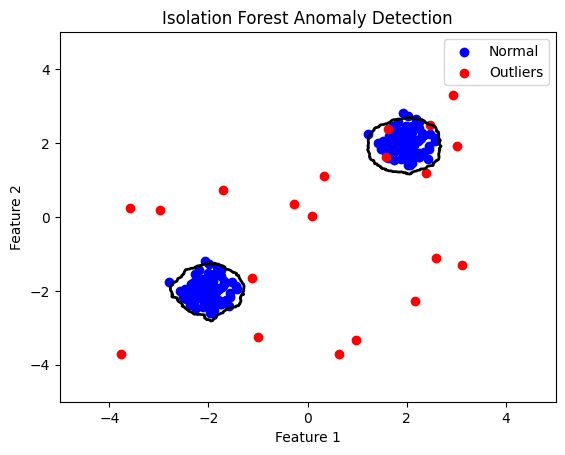

In [7]:
# 可視化
plt.scatter(X_normal[:, 0], X_normal[:, 1], c='b', label="Normal")
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='r', label="Outliers")
plt.contour(xx, yy, Z_iso, levels=[threshold_iso], linewidths=2, colors='black')
plt.legend()
plt.title("Isolation Forest Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()